## 1. 퍼셉트론

신경망의 기원이 되는 알고리즘 <Br>
다수의 신호 (x1, x2..) 를 입력받아 하나의 이진 신호 (0, 1)을 출력하는 시스템

1. 뉴런(노드)로 부터 입력 신호를 전달 받음

2. 각 뉴런과 가중치를 곱한 후 합하여 출력 신호에 전달

3. 이 때 이 입력 신호의 합이 임계값을 넘어가면 TRUE 

### (1) 논리회로 게이트 구현

In [16]:
#AND 퍼셉트론 구현

def AND(x1, x2):
    w1, w2, theta = 0.5, 0.5, 0.7
    tmp = x1 * w1 + x2 * w2
    if tmp <= theta:
        return 0
    elif tmp > theta:
        return 1
    
AND(1, 1)

1

In [3]:
# AND 퍼셉트론 구현 (-세타를 편향으로 치환)
import numpy as np 

def AND2 (x1, x2):
    x = np.array([x1, x2]) # input signal
    w = np.array([0.5, 0.5]) # weight
    b = -0.7 #bias 
    tmp = np.sum(w*x) + b
    if tmp <= 0 :
        return(0)
    elif tmp > 0:
        return(1)

AND2(1, 1)

# theta를 -bias 로 치환하여 계산한다!

1

편향은 *뉴런이 얼마나 쉽게 활성화를 하느냐*를 조정하는 매개변수!

In [12]:
#NAND / OR 퍼셉트론 구현

def NAND(x1, x2):
    x = np.array([x1, x2]) # input signal
    w = np.array([-0.5, -0.5]) # weight
    b = 0.7 #bias
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return(0)
    elif tmp > 0:
        return(1)
print(NAND(1, 1))

def OR (x1, x2):
    x = np.array([x1, x2]) # input signal
    w = np.array([0.5, 0.5]) # weight
    b = -0.2 #bias
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return(0)
    else:
        return(1)
    
print(OR(1, 0))
print(OR(0, 0))

0
1
0


NAND <-> AND : 가중치(weight & bias)의 부호를 변경하여 결과가 반대로 나오게 함
<br>
OR 퍼셉트론 역시 가중치의 변화만 있을 뿐!

### (2) 퍼셉트론을 통한 논리회로 게이트 구현의 한계

- XOR 게이트의 경우 선형으로 나타내기가 어려워 위 퍼셉트론 구조로는 나타낼 수 없음
- 따라서 곡선 형태를 띄는 비선형 형태의 퍼셉트론 구조가 필요

*이는 **다층 퍼셉트론** 을 통해 만들 수 있다!*

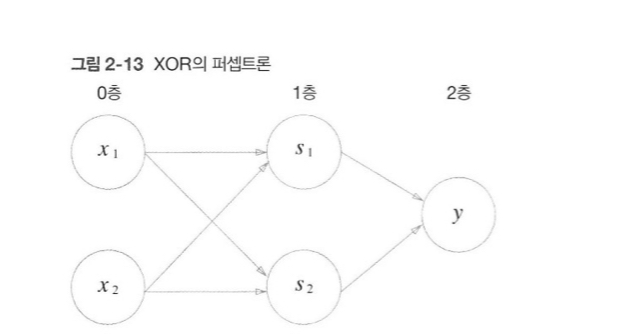

In [18]:
# XOR 게이트 구현 : 1차 output -> (NAND, OR), 2차 output -> AND

def XOR(x1, x2) :
    s1 = NAND(x1, x2)
    s2 = OR(x1, x2)
    y = AND(s1, s2)
    return(y)

print(XOR(1, 0))
print(XOR(1, 1))
#1, 1 -> 0, 1 -> 0

1
0


컴퓨터도 이층 퍼셉트론이면 만들 수 있다? : Yes 

시그모이드 함수를 **활성화 함수**로 이용하면 만들 수 있다 

**활성화 함수란?** 

## 2. 신경망

**가중치 매개변수를 자동으로 설정해준다!** (vs 퍼셉트론)

신경망의 구조 : 보이지 않는 '은닉층'이 추가 됨 -> 간단하게, 더 복잡해졌다

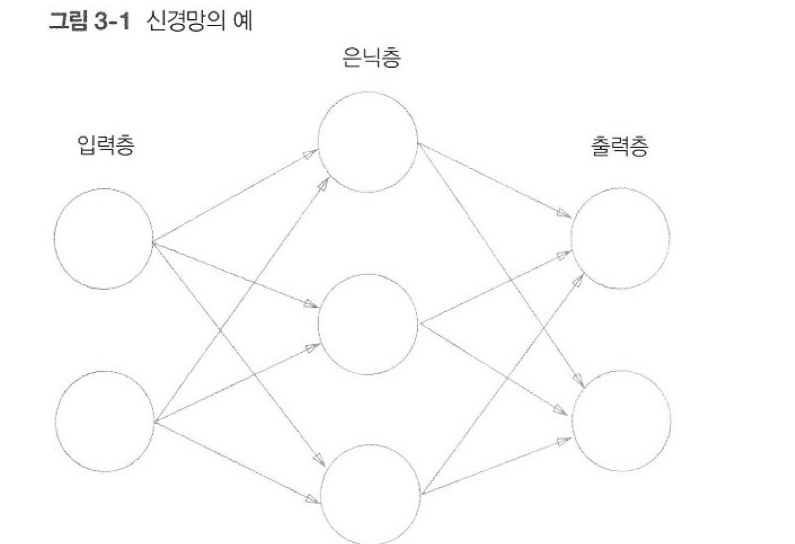

1. a = w1x1 + w2x2 + b

2. h(a) = y (활성화 함수)

### (1) 활성화 함수 : 계단 함수 구현

값이 바뀌는 형태가 계단 형태일 경우

/var/folders/g_/dk3yfcbs6kg3ppmw05fqnl2h0000gn/T/ipykernel_27553/1843025862.py:4: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return(np.array(x>0, dtype = np.int))


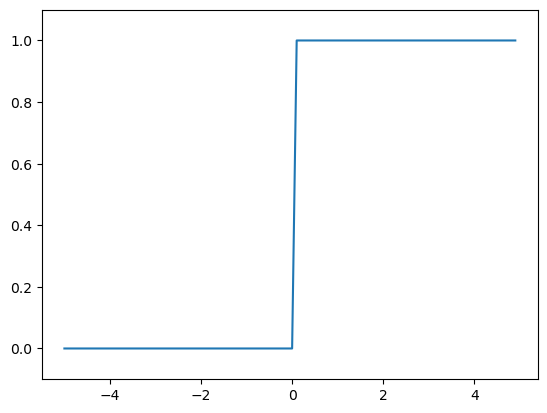

In [20]:
import matplotlib.pylab as plt

def step_func(x):
    return(np.array(x>0, dtype = np.int))

x = np.arange(-5.0, 5.0, 0.1)
y = step_func(x)

plt.plot(x,y)
plt.ylim(-0.1, 1.1)
plt.show()

### (2) 활성화 함수 : 시그모이드 함수 구현하기

In [21]:
def sigmoid(x):
    return( 1/(1+np.exp(-x)))

x = np.array([-1.0, 1.0, 2.0])
sigmoid(x)

array([0.26894142, 0.73105858, 0.88079708])

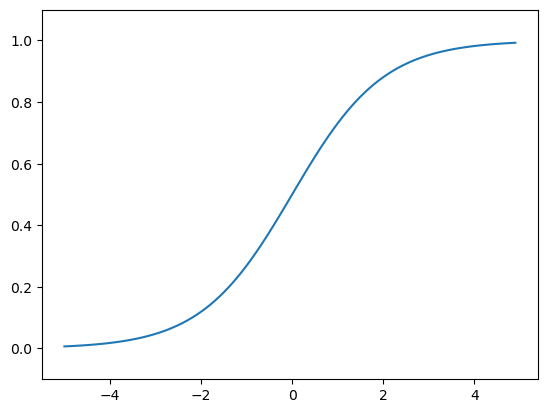

In [22]:
x = np.arange(-5, 5, 0.1)
y = sigmoid(x)

plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

시그모이드 활성화 함수

- 0 ~ 1 사이의 값을 준다

- 비선형 함수이다

** 비선형 함수란?

    간단하게, 직선 한 개로 그릴 수 없는 함수

그렇다면 왜 비선형 함수를 활성화 함수로 쓰는 게 좋은 것인가?

- 선형 함수가 활성화 함수가 되면 h(h((...(h(x)))))를 진행해도 결국 하나의 선형 함수가 되기 때문에, 은닉층이 필요없는 네트워크가 된다.
- 그럼 신경망이라는 걸 쓸 이유가 없다!

### (3) 활성화 함수 : ReLU 함수 구현

0을 넘으면 그대로 출력 / 0 이하는 0을 출력


In [24]:
def ReLU(x):
    return(np.maximum(x, 0))

x = np.array([-0.1, -2.0, 0.3, 0, 0.5])
ReLU(x)

array([0. , 0. , 0.3, 0. , 0.5])

### (4) 다차원 배열의 계산

In [30]:
# 행렬의 곱

A = np.array([[1,2], [3,4]])
B = np.array([[5,6], [7,8]])

print(A.shape, B.shape)

np.dot(A, B) #행렬 곱 계산 -> return class numpy

## 계산 시 행렬의 shape에 주의!

(2, 2) (2, 2)


array([[19, 22],
       [43, 50]])

In [36]:
# 신경망에서의 행렬의 곱
# 만약 입력신호가 2개이고,출력 신호가 3개인 신경망 구조라면?
# x : 2,  w : 2 x 3  -> y : 3 (Wx = y 형태)
x = np.array([1,2])
w = np.array([[1, 3, 5], [2, 4, 6]])
print(w.shape)

y = np.dot(x, w)
print(y)

# np.dot(w, x)는 될까? : No, shape을 항상 맞춰주자!

(2, 3)
[ 5 11 17]


### (5) 3층 신경망 구현

입력층 2개 + 편향 노드 -> 은닉층1 3개 -> 은닉층2 2개 -> 출력층 2개

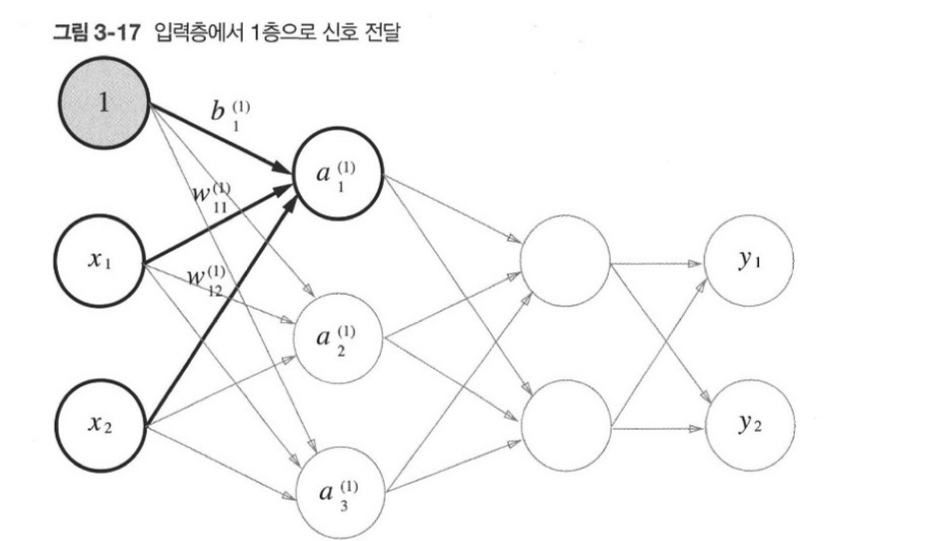

a1(1) = w11(1)x1 + w12(1)x2 + b1(1)

(1) : 몇 층의 가중치 <br>
11 : 다음 층의 뉴런 순서 + 이전 층의 뉴런 순서

In [40]:
#1층 -> 2층

X = np.array([1.0, 0.5])
W1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]]) 
B1 = np.array([0.1, 0.2, 0.3]) #bias의 가중치 : 기본 입력층이 1이므로 + 형태로

print(X.shape, W1.shape, B1.shape)
A1 = np.dot(X, W1) + B1
print(A1)

(2,) (2, 3) (3,)
[0.3 0.7 1.1]


In [41]:
#2층 : 은닉층1, 활성화 함수는 시그모이드로

Z1 = sigmoid(A1)
print(Z1)

[0.57444252 0.66818777 0.75026011]


In [43]:
# 은닉층 1 -> 은닉층 2
W2 = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
B2 = np.array([0.1, 0.2])

A2 = np.dot(Z1, W2) + B2
print(A2)

#2층 : 은닉층2, 활성화 함수는 시그모이드로
Z2 = sigmoid(A2)
print(Z2)

[0.51615984 1.21402696]
[0.62624937 0.7710107 ]


In [46]:
#2층 - 3층

W3 = np.array([[0.1, 0.3], [0.2, 0.4]])
B3 = np.array([0.1, 0.2])

A3 = np.dot(Z2, W3) + B3
print(A3)

def identity_function(x): #출력함수는 항등함수로
    return(x)

Y = identity_function(A3)
print(Y)

[0.31682708 0.69627909]
[0.31682708 0.69627909]


전체 모델 구현은 이론 교재 p89 참조 (순방향 구현)

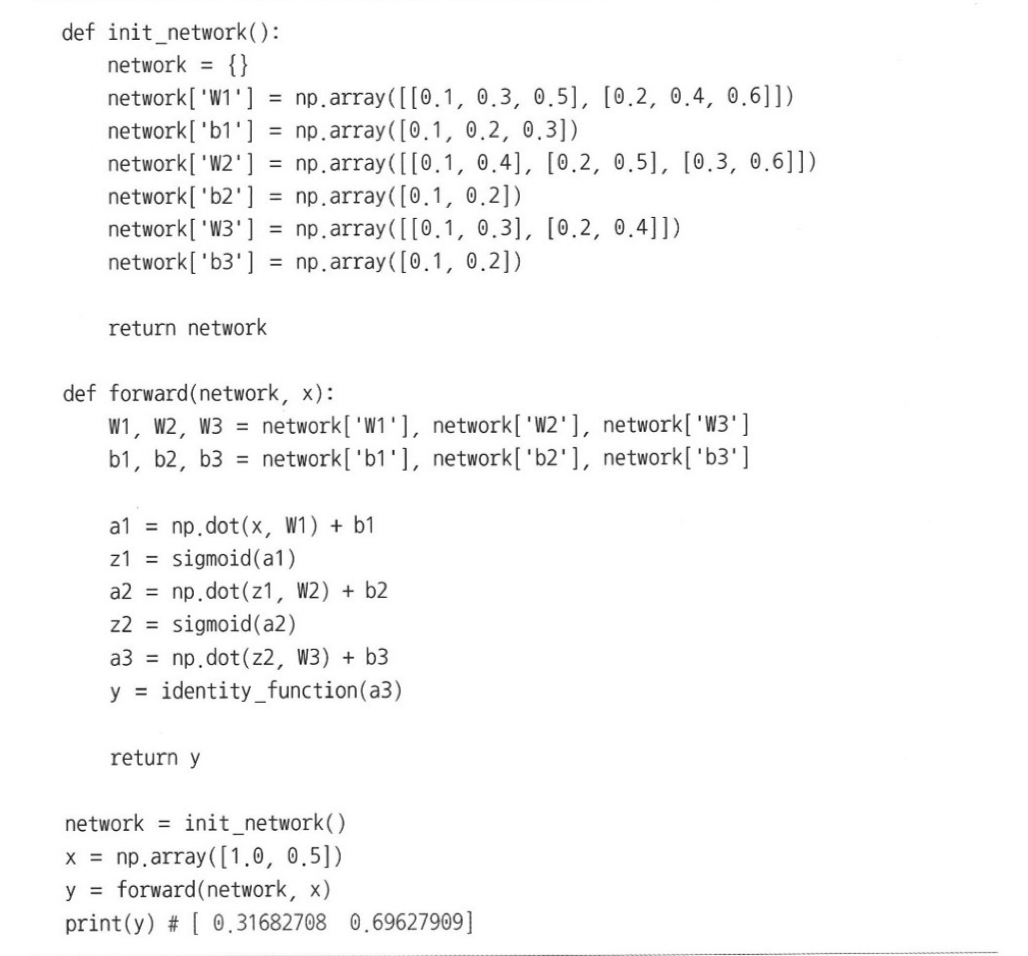

### (5) 출력층 함수 설계하기

In [47]:
#softmax function : 벡터의 각 exp(원소 값)을 exp(원소 값)의 총합으로 나눈 것

def softmax(x):
    exp_x = np.exp(x)
    sum_exp_x = np.sum(exp_x)
    y = exp_x / sum_exp_x
    return(y)

softmax(np.array([0.3, 2.9, 4.0]))

array([0.01821127, 0.24519181, 0.73659691])

**그러나, softmax 함수는...**

오버플로우 문제가 있다.

- overflow : 지수 함수를 사용하는 특성 상, 지수가 커질 경우 exp 값이 무한대로 커질 수가 있다 
             이는, 컴퓨터 상으로 계산하는 데 한계에 부딫힐 수 있다.

- 따라서 이를 해결하기 위해 각 입력신호의 Exp 값을 구할 때 각 원소에 임의의 값을 더하거나 빼 overflow 문제를 해결할 수 있다.
    - 이러한 결과는 기존 softmax 함수의 결과값과 똑같은가? : Yes (이론 교재 95p)

In [50]:
# overflow 해결 softmax function

def softmax_renew(x):
    c = np.max(x) # 입력 신호의 최댓값을 C로 사용
    exp_x = np.exp(x-c) # exp(a - c)
    sum_exp_x = np.sum(exp_x)
    return(exp_x / sum_exp_x)

print(softmax(np.array([0.3, 2.9, 4.0])))
print(softmax_renew(np.array([0.3, 2.9, 4.0])))

    

[0.01821127 0.24519181 0.73659691]
[0.01821127 0.24519181 0.73659691]


**그렇다면, softmax 함수를 출력 함수에 쓴다는 것은?**

확률! 

각 입력신호에 따라 특정한 확률을 출력해내는 신경망!

exp(x)는 단조 증가함수기 때문에 대소 관계도 변화 없음

**출력층의 노드 수는?**

분류하고자 하는 클래스 수에 맞게!

### (6) 예제 손글씨 숫자 인식 with forward